In [4]:
import pandas as pd

df = pd.read_csv("uber.csv")
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())


(200000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787

In [6]:
df = df.dropna().drop_duplicates()
df = df[df['fare_amount'] > 0]
df = df[df['fare_amount'] < 500]
df.to_csv("uber_cleaned.csv", index=False)


Matplotlib is building the font cache; this may take a moment.


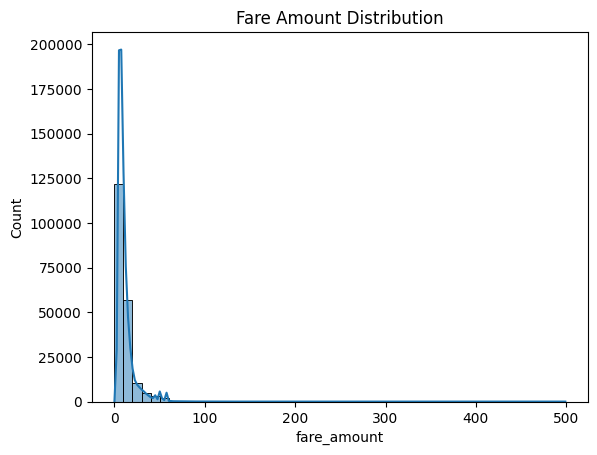

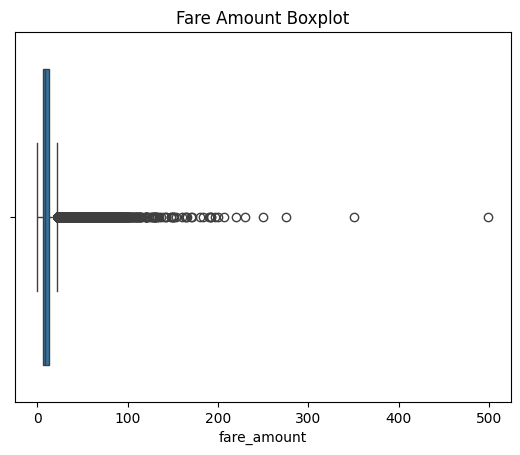

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Fare Amount Distribution")
plt.show()

sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount Boxplot")
plt.show()


In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
df['peak_time'] = df['hour'].apply(lambda h: 'Peak' if 7 <= h <= 9 or 17 <= h <= 20 else 'Off-Peak')
df.to_csv("uber_enhanced.csv", index=False)


In [10]:
df.to_csv("uber_cleaned.csv", index=False)

In [13]:
new_df= pd.read_csv("uber_cleaned.csv")
print(new_df.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

             pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1  2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2  2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3  2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4  2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day  month  \
0         -73.999512         40.723217                1    19    7      5   
1         -73.994710         40.750325                1    20   17      7   

In [18]:




import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    return r * c

df['trip_distance_km'] = df.apply(lambda row: haversine_distance(
    row['pickup_latitude'],
    row['pickup_longitude'],
    row['dropoff_latitude'],
    row['dropoff_longitude']
), axis=1)


In [19]:
df.to_csv("uber_cleaned.csv", index=False)